Metal device set to: Apple M1 Max


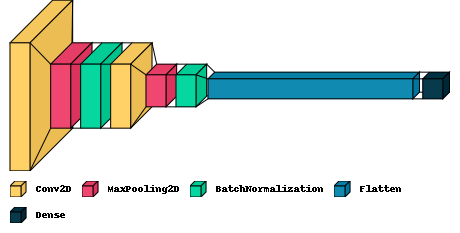

In [1]:
import visualkeras
from PIL import ImageFont
import numpy as np
import matplotlib.pyplot as plt
from utils import *

IMG_SIZE=32
batch_size=32
dae_cnn=DAE_CNN(batch_size=batch_size,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3),latent_dim=100)

dae=DAE(batch_size=batch_size,
                 input_dim=IMG_SIZE*IMG_SIZE*3, latent_dim=100)


visualkeras.layered_view(dae_cnn.encoder, legend=True,
    to_file='../figures/dae_cnn_encoder.png')

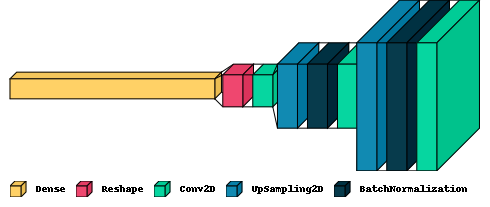

In [20]:
visualkeras.layered_view(dae_cnn.decoder, legend=True,
    to_file='../figures/dae_cnn_decoder.png')

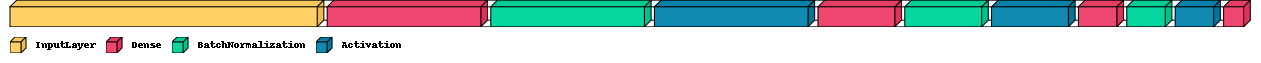

In [21]:
visualkeras.layered_view(dae.encoder, legend=True,
    to_file='../figures/dae_encoder.png')

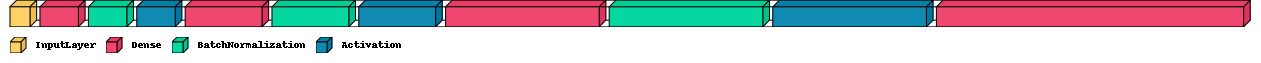

In [22]:
visualkeras.layered_view(dae.decoder, legend=True, 
    to_file='../figures/dae_decoder.png')

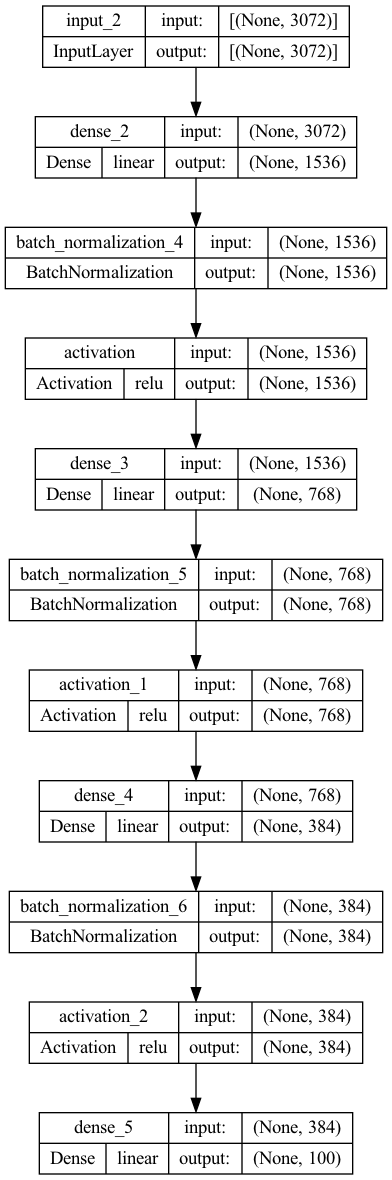

In [2]:
tf.keras.utils.plot_model(
    dae.encoder,
    to_file="../figures/dae_encoder_scheme.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

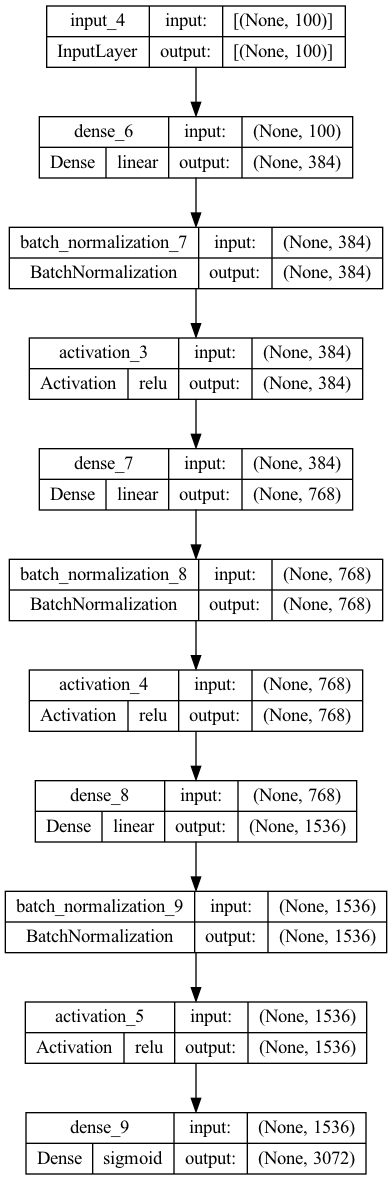

In [4]:
tf.keras.utils.plot_model(
    dae.decoder,
    to_file="../figures/dae_decoder_scheme.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

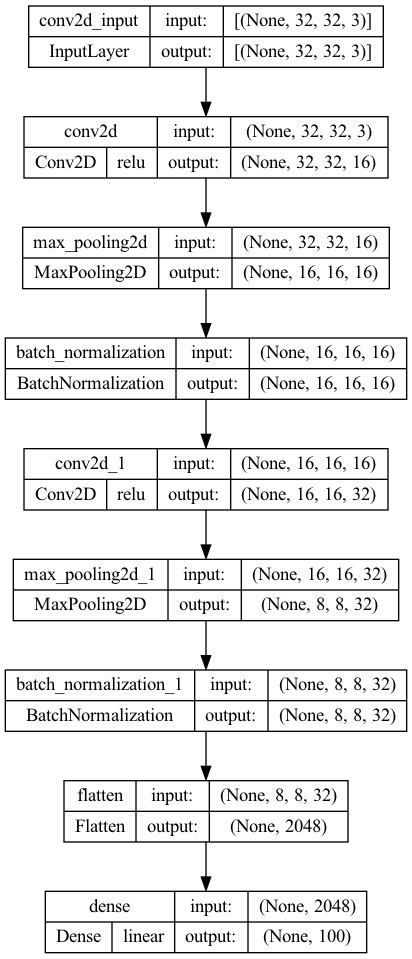

In [6]:
tf.keras.utils.plot_model(
    dae_cnn.encoder,
    to_file="../figures/dae_cnn_encoder_scheme.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

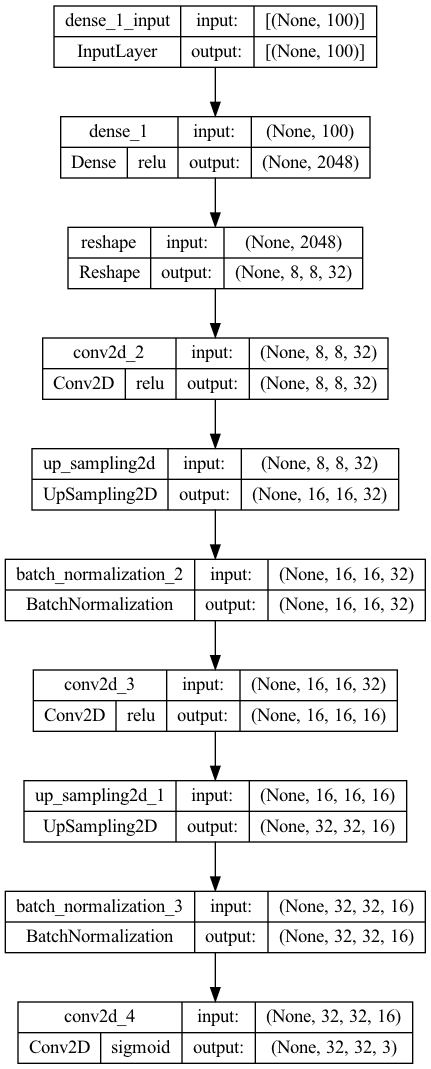

In [7]:
tf.keras.utils.plot_model(
    dae_cnn.decoder,
    to_file="../figures/dae_cnn_decoder_scheme.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

## 2 ) Visualizing some Dataset Images

In [24]:
# Set the path to the folder containing the image data
data_path = '../dataset/input_resized_256/flowers/'
# Create an instance of the DimReductionEvaluation class
dre_256 = DimReductionEvaluation()
dre_256.load_data(data_path, 256)
dre_32 = DimReductionEvaluation()
dre_32.load_data(data_path, 32)



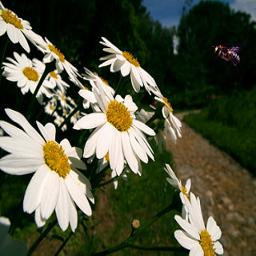

In [48]:
samples=dre_32.data[dre_32.data['label']=='daisy'].sample(3)
list(samples['image'])[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

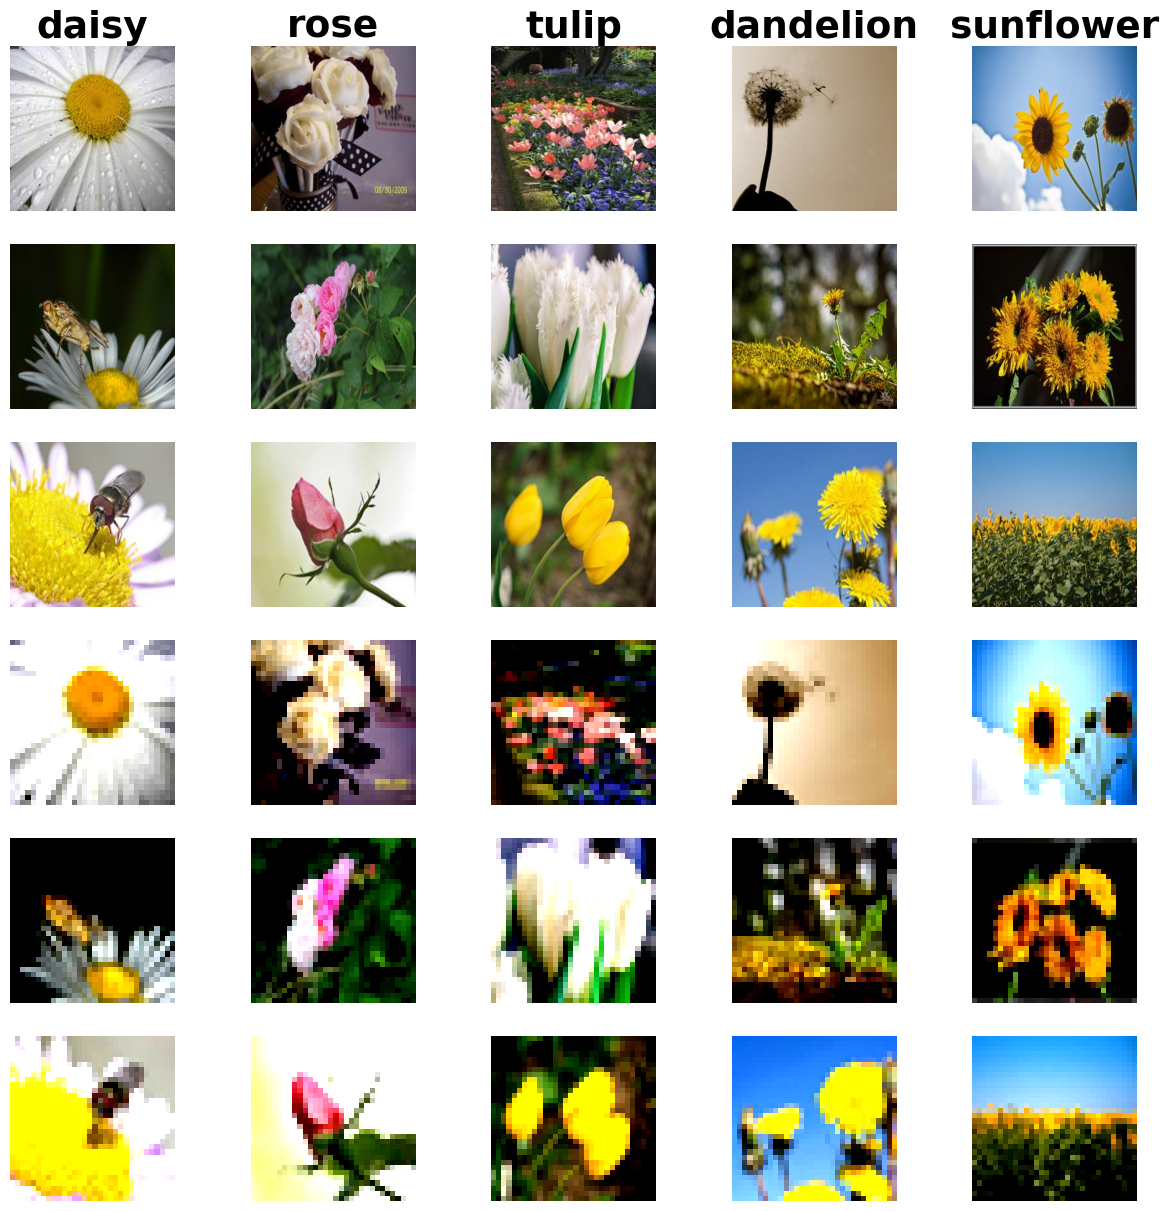

In [65]:
fig,ax=plt.subplots(6, 5)
fig.set_size_inches(15, 15)
labels=dre_32.data['label'].unique()
for i, label in enumerate(labels):
    samples=dre_32.data[dre_32.data['label']==label].sample(3)

    for j in range(3):
        plt.subplot(6, 5, j*5+i+1)
        if j==0:
            plt.title(label, fontsize=27, fontweight='bold')
        plt.imshow(list(samples['image'])[j])
        plt.axis('off')
    for j in range(3):
        plt.subplot(6, 5, (j+3)*5+i+1)
        plt.imshow(list(samples['numpy'])[j]+.5)
        plt.axis('off')
plt.savefig('../figures/dataset_example_images.png')

In [ ]:


fig,ax=plt.subplots(5,4)
fig.set_size_inches(15, 15)
for i in range(5):
    for j in range (4):
        l=rn.randint(0, len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])

plt.savefig('../figures/dataset_uncompresed_images.png')
plt.tight_layout()
        